# Import packages

In [ ]:
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import rc

In [ ]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
flight_history = pd.read_csv('gdrive/MyDrive/Colab Notebooks/LexisNexis/flight_history.csv')
#airports dataset comes from R package nycflights13 
airports = pd.read_csv('gdrive/MyDrive/Colab Notebooks/LexisNexis/airports.csv')
flight_test = pd.read_csv('gdrive/MyDrive/Colab Notebooks/LexisNexis/flight_test.csv')
planes = pd.read_csv('gdrive/MyDrive/Colab Notebooks/LexisNexis/planes.csv')

First check the location of origin and location of destination. 

In [ ]:
print('flight_history origin:',flight_history.origin.unique())
print('flight_test origin:',flight_test.origin.unique())

flight_history origin: ['EWR' 'LGA' 'JFK']
flight_test origin: ['LGA' 'EWR' 'JFK']


In [ ]:
dest_history = set(flight_history.dest.unique())
dest_test = set(flight_test.dest.unique())

In [ ]:
print('Destination in test data:\n',dest_test)
print('Destination in history data:\n',dest_history)

Destination in test data:
 {'PSE', 'BQN', 'SEA', 'PHX', 'SLC', 'MDW', 'OKC', 'PBI', 'BUR', 'SAN', 'SDF', 'DEN', 'XNA', 'ABQ', 'PIT', 'IND', 'MSY', 'MSN', 'LAX', 'DAY', 'SFO', 'MYR', 'RIC', 'CAE', 'PWM', 'CLT', 'GSP', 'DSM', 'MKE', 'ACK', 'BWI', 'PHL', 'JAX', 'ATL', 'IAH', 'SJC', 'BNA', 'MCO', 'BZN', 'SAV', 'SRQ', 'STL', 'RSW', 'TYS', 'MVY', 'CVG', 'MHT', 'GSO', 'RDU', 'BHM', 'ROC', 'CHS', 'BOS', 'CMH', 'HOU', 'MCI', 'DFW', 'ORF', 'DCA', 'GRR', 'HNL', 'OAK', 'OMA', 'SJU', 'BGR', 'MEM', 'TPA', 'CAK', 'LGB', 'BUF', 'MIA', 'TUL', 'PVD', 'ORD', 'TVC', 'STT', 'SYR', 'SMF', 'PDX', 'CLE', 'ALB', 'AUS', 'FLL', 'LAS', 'MSP', 'SNA', 'ANC', 'DTW', 'BTV', 'SAT', 'IAD', 'AVL'}
Destination in history data:
 {'PSE', 'BQN', 'SEA', 'PHX', 'SLC', 'MDW', 'OKC', 'BDL', 'PBI', 'BUR', 'SAN', 'SDF', 'DEN', 'XNA', 'ABQ', 'PIT', 'IND', 'MSN', 'MSY', 'LAX', 'DAY', 'JAC', 'SFO', 'MYR', 'RIC', 'CAE', 'PWM', 'CLT', 'GSP', 'DSM', 'MKE', 'EYW', 'ACK', 'BWI', 'PHL', 'JAX', 'ATL', 'IAH', 'SJC', 'BNA', 'MCO', 'BZN', 'SA

In [ ]:
airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [ ]:
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [ ]:
selected_dest_his = airports[airports['faa'].isin(dest_history)]
selected_dest_tes = airports[airports['faa'].isin(dest_test)]

Check the destination for history data and test data to make sure i didn't miss any information
during scraping weather data(If the destination is in other country, i need to find the name of that internation
destination and put it into the scraping code.)

In [ ]:
print('history data destination:\n',selected_dest_his.tzone.unique())
print('\n')
print('test data destination:\n',selected_dest_tes.tzone.unique())

history data destination:
 ['America/Denver' 'America/New_York' 'America/Chicago'
 'America/Los_Angeles' 'Pacific/Honolulu' 'America/Phoenix']


test data destination:
 ['America/Denver' 'America/New_York' 'America/Anchorage' 'America/Chicago'
 'America/Los_Angeles' 'Pacific/Honolulu' 'America/Phoenix']


From the above time zone, we can see that all of the airport in the history data and test data is in America.

#**Read and process weather data**

In [ ]:
wea_dest_his = pd.read_csv('gdrive/MyDrive/Colab Notebooks/LexisNexis/dest_his.csv',index_col=0)
wea_dest_his.reset_index(drop=True,inplace=True)
wea_dest_tes = pd.read_csv('gdrive/MyDrive/Colab Notebooks/LexisNexis/dest_tes.csv',index_col=0)
wea_dest_tes.reset_index(drop=True,inplace=True)
wea_origin = pd.read_csv('gdrive/MyDrive/Colab Notebooks/LexisNexis/origin.csv',index_col=0)
wea_origin.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6,7,9,10,11,13,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,9,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
wea_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17802 entries, 0 to 17801
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station            17802 non-null  object 
 1   valid              17802 non-null  object 
 2   lon                17802 non-null  float64
 3   lat                17802 non-null  float64
 4   tmpf               17802 non-null  float64
 5   dwpf               17802 non-null  float64
 6   relh               17802 non-null  object 
 7   drct               17802 non-null  object 
 8   sknt               17802 non-null  object 
 9   p01i               17802 non-null  float64
 10  alti               17802 non-null  float64
 11  mslp               17802 non-null  object 
 12  vsby               17802 non-null  float64
 13  gust               17802 non-null  object 
 14  skyc1              17802 non-null  object 
 15  skyc2              17802 non-null  object 
 16  skyc3              178

In [ ]:
wea_dest_his.head()

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth
0,PIT,2013-01-01 00:13,-80.2329,40.4915,30.2,28.4,92.92,230.00,11.0,0.0001,...,-SN,M,M,M,M,M,M,20.19,KPIT 010013Z 23011G16KT 7SM -SN SCT006 BKN010 ...,M
1,PIT,2013-01-01 00:51,-80.2329,40.4915,30.92,26.96,85.05,220.00,9.0,0.0001,...,-SN,M,M,M,M,M,M,22.17,KPIT 010051Z 22009G18KT 9SM -SN FEW007 BKN013 ...,M
2,PIT,2013-01-01 01:51,-80.2329,40.4915,30.92,26.96,85.05,230.00,9.0,0.0001,...,-SN,M,M,M,M,M,M,22.17,KPIT 010151Z 23009G17KT 9SM -SN SCT008 OVC013 ...,M
3,PIT,2013-01-01 02:51,-80.2329,40.4915,30.92,26.96,85.05,230.00,11.0,0.0001,...,-SN,M,M,M,M,M,M,21.1,KPIT 010251Z 23011G17KT 10SM -SN FEW009 OVC014...,M
4,PIT,2013-01-01 03:51,-80.2329,40.4915,32.0,26.96,81.42,250.00,7.0,0.0001,...,-SN,M,M,M,M,M,M,24.78,KPIT 010351Z 25007KT 9SM -SN OVC014 00/M03 A30...,M


Originally the website automically filled NA value with letter M, here i repalce M back to NA value to check 
the number of NA value in each feature

In [ ]:
wea_dest_his.iloc[:,1:] = wea_dest_his.iloc[:,1:].replace('M',np.nan)
wea_dest_tes.iloc[:,1:] = wea_dest_tes.iloc[:,1:].replace('M',np.nan)
wea_origin.iloc[:,1:] = wea_origin.iloc[:,1:].replace('M',np.nan)

In [ ]:
print(wea_dest_his.info())
print(wea_dest_tes.info())
print(wea_origin.info())
# Here we don't keep longitude and latitude as the station already contains location information
# and we don't keep features with too many NA value

In [ ]:
weather_features_keep = ['station','valid','lon','lat','tmpf','dwpf','relh','drct','sknt','vsby']

In [ ]:
wea_dest_his_keep = wea_dest_his[weather_features_keep]
wea_dest_tes_keep = wea_dest_tes[weather_features_keep]
wea_origin_keep = wea_origin[weather_features_keep]

We need to append this weather feature into original dataset. The keys to append these features are station and valid. Here for valid we only keep year-month-day-hour so that the two dataframe could merge. Besides, for weather dataset, there might be multiple records for one particular hour, here i take average to make sure each one hour only have one observation.

In [ ]:
wea_dest_his_keep['valid'] = pd.to_datetime(wea_dest_his_keep['valid'].str[0:14] + '00')
wea_dest_tes_keep['valid'] = pd.to_datetime(wea_dest_tes_keep['valid'].str[0:14] + '00')
wea_origin_keep['valid'] = pd.to_datetime(wea_origin_keep['valid'].str[0:14] + '00')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
wea_dest_his_keep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513707 entries, 0 to 513706
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   station  513707 non-null  object        
 1   valid    513707 non-null  datetime64[ns]
 2   lon      513707 non-null  float64       
 3   lat      513707 non-null  float64       
 4   tmpf     513505 non-null  object        
 5   dwpf     513370 non-null  object        
 6   relh     513136 non-null  object        
 7   drct     502270 non-null  object        
 8   sknt     513418 non-null  object        
 9   vsby     513344 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 39.2+ MB


In [ ]:
wea_dest_his_keep[['tmpf','dwpf','relh','drct','sknt','vsby']] = wea_dest_his_keep[['tmpf','dwpf','relh','drct','sknt','vsby']].astype(float)
wea_dest_tes_keep[['tmpf','dwpf','relh','drct','sknt','vsby']] = wea_dest_tes_keep[['tmpf','dwpf','relh','drct','sknt','vsby']].astype(float)
wea_origin_keep[['tmpf','dwpf','relh','drct','sknt','vsby']] = wea_origin_keep[['tmpf','dwpf','relh','drct','sknt','vsby']].astype(float)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
wea_dest_his_keep.iloc[:,0:10].head()

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,vsby
0,PIT,2013-01-01 00:00:00,-80.2329,40.4915,30.20,28.40,92.92,230.0,11.0,7.0
1,PIT,2013-01-01 00:00:00,-80.2329,40.4915,30.92,26.96,85.05,220.0,9.0,9.0
2,PIT,2013-01-01 01:00:00,-80.2329,40.4915,30.92,26.96,85.05,230.0,9.0,9.0
3,PIT,2013-01-01 02:00:00,-80.2329,40.4915,30.92,26.96,85.05,230.0,11.0,10.0
4,PIT,2013-01-01 03:00:00,-80.2329,40.4915,32.00,26.96,81.42,250.0,7.0,9.0


In [ ]:
wea_dest_his_keep = wea_dest_his_keep.groupby(['station','valid']).mean().reset_index()
wea_dest_tes_keep = wea_dest_tes_keep.groupby(['station','valid']).mean().reset_index()
wea_origin_keep = wea_origin_keep.groupby(['station','valid']).mean().reset_index()

In [ ]:
flight_test.head()

,uniqueid,year,month,day,sched_dep_time,sched_arr_time,carrier,flight,tailnum,origin,dest,hour,minute,time_hour,lateflight
0,1,2013,7,14,1440,1749,DL,1902,N965DL,LGA,PBI,14,40,7/14/13 14:00,0.0
1,2,2013,7,7,945,1305,AA,1871,N3AJAA,LGA,MIA,9,45,7/7/13 9:00,0.0
2,3,2013,7,5,1200,1435,DL,1947,N608DA,LGA,ATL,12,0,7/5/13 12:00,0.0
3,4,2013,7,22,650,808,EV,5811,N16919,EWR,BUF,6,50,7/22/13 6:00,1.0
4,5,2013,7,2,1630,1930,AA,881,N3FCAA,JFK,DFW,16,30,7/2/13 16:00,1.0


# Extract new features from flight history dataset(EDA on flight history)

In [ ]:
flight_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166158 entries, 0 to 166157
Data columns (total 19 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   year                                                166158 non-null  int64  
 1   month                                               166158 non-null  int64  
 2   day                                                 166158 non-null  int64  
 3   dep_time                                            161275 non-null  float64
 4   sched_dep_time                                      166158 non-null  int64  
 5   dep_delay                                           161275 non-null  float64
 6   arr_time                                            161057 non-null  float64
 7   sched_arr_time                                      166158 non-null  int64  
 8   arr_delay                                           160678 non-n

1: distance between origin place and dest place(keywords are origin and dest)
2:% of all flights for that carrier that are delayed

In [ ]:
flight_history.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time(length of flight spent in air in minutes),distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/13 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/13 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/13 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/13 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/13 6:00


For history data, let's create a new column indicating whether that flight delayed or not.

In [ ]:
def delay(row):
  if row['arr_delay'] > 0:
    return 1
  else:
    return 0
flight_history['delay'] = flight_history.apply(lambda row: delay(row),axis=1)

In [ ]:
flight_history.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time(length of flight spent in air in minutes),distance,hour,minute,time_hour,delay
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/13 5:00,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/13 5:00,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/13 5:00,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/13 5:00,0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/13 6:00,0


**EDA from time angle**

In [ ]:
def bar_plot(flight_history,colname):
  temp1 = flight_history[[colname,'delay']].groupby(colname).count().reset_index()
  temp2 = flight_history[[colname,'delay']].groupby(colname).sum().reset_index().rename(columns={'delay':'num_delay'})
  temp3 = pd.concat([temp1,temp2[['num_delay']]],axis=1)
  temp3['per_delay'] = temp3.num_delay/temp3.delay
  temp3['per_non_delay'] = 1-temp3.per_delay
  return temp3

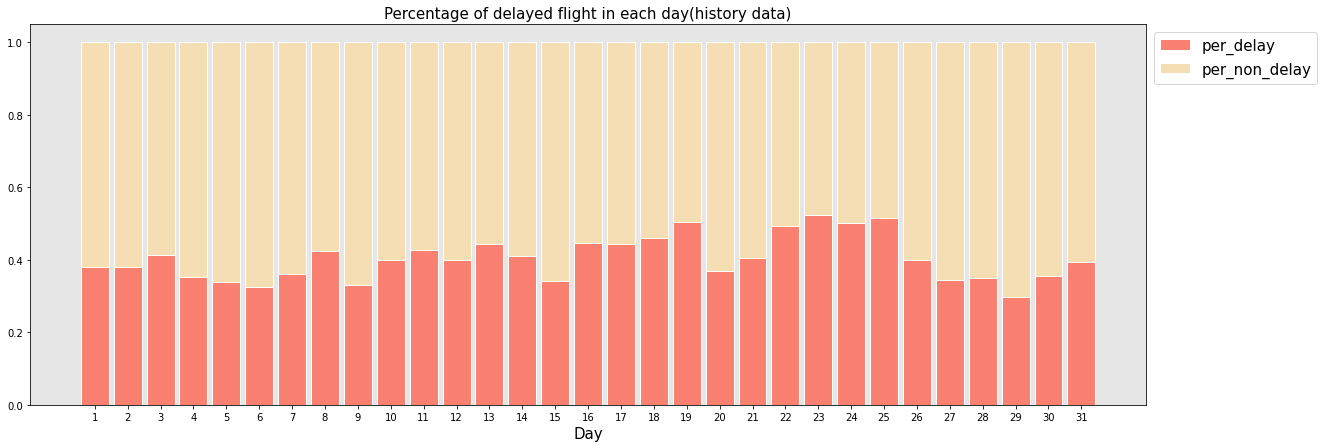

In [ ]:
temp3 = bar_plot(flight_history,'day')
barWidth = 0.85
plt.figure(figsize=(20,7))
plt.axes(facecolor='#E6E6E6')
r = list(temp3['day'].astype(int)) 
names = list(temp3['day'].astype(str))
plt.bar(r, list(temp3['per_delay']), color='salmon', edgecolor='white', width=barWidth,label='per_delay')
plt.bar(r, list(temp3['per_non_delay']), bottom=list(temp3['per_delay']), color='wheat', edgecolor='white', width=barWidth,
        label='per_non_delay')
plt.xticks(r, names)
plt.xlabel("Day",fontsize=15)
plt.title('Percentage of delayed flight in each day(history data)',fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1,fontsize=15)
#plt.tight_layout()
plt.show()

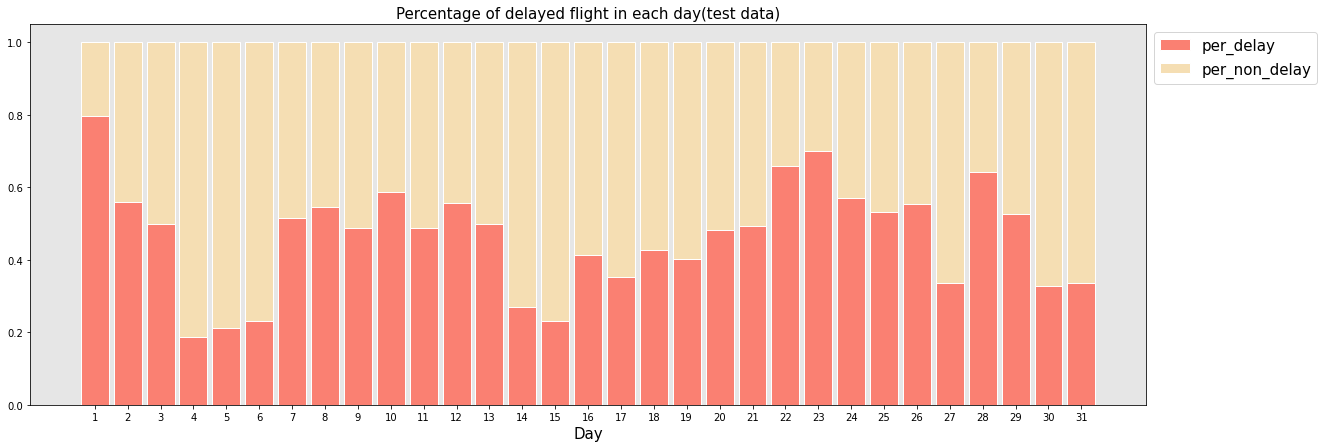

In [ ]:
temp1 = flight_test[['day','lateflight']].groupby('day').count().reset_index()
temp2 = flight_test[['day','lateflight']].groupby('day').sum().reset_index().rename(columns={'lateflight':'num_delay'})
temp3 = pd.concat([temp1,temp2[['num_delay']]],axis=1)
temp3['per_delay'] = temp3.num_delay/temp3.lateflight
temp3['per_non_delay'] = 1-temp3.per_delay
#temp3 = bar_plot(flight_test,'day')
barWidth = 0.85
plt.figure(figsize=(20,7))
plt.axes(facecolor='#E6E6E6')
r = list(temp3['day'].astype(int)) 
names = list(temp3['day'].astype(str))
plt.bar(r, list(temp3['per_delay']), color='salmon', edgecolor='white', width=barWidth,label='per_delay')
plt.bar(r, list(temp3['per_non_delay']), bottom=list(temp3['per_delay']), color='wheat', edgecolor='white', width=barWidth,
        label='per_non_delay')
plt.xticks(r, names)
plt.xlabel("Day",fontsize=15)
plt.title('Percentage of delayed flight in each day(test data)',fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1,fontsize=15)
#plt.tight_layout()
plt.show()

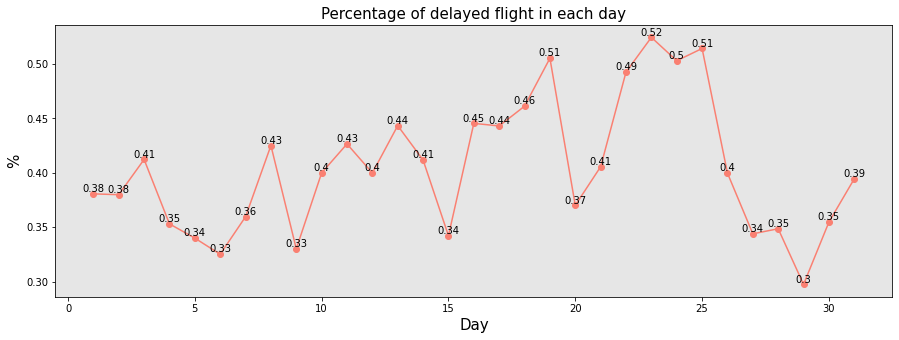

In [ ]:
plt.figure(figsize=(15,5))
plt.axes(facecolor='#E6E6E6')
temp3 = bar_plot(flight_history,'day')
temp3[['day','per_delay']]
plt.plot('day', 'per_delay', data=temp3[['day','per_delay']], linestyle='-', marker='o',color='salmon')
plt.xlabel('Day',fontsize=15)
plt.ylabel('%',fontsize=15)
plt.title('Percentage of delayed flight in each day',fontsize=15)
for x,y in zip(temp3['day'],temp3['per_delay']):
  plt.text(x, y, round(y,2), ha = 'center', va = 'bottom')
plt.show()

In [ ]:
flight_history['time_hour'] = pd.to_datetime(flight_history['time_hour'])

In [ ]:
flight_history.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time(length of flight spent in air in minutes),distance,hour,minute,time_hour,delay
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0


In [ ]:
def day_of_week(row):
  return row['time_hour'].weekday()
flight_history['day_of_week'] = flight_history.apply(lambda row: day_of_week(row),axis=1)

In [ ]:
flight_test['time_hour'] = pd.to_datetime(flight_test['time_hour'])

In [ ]:
flight_test['day_of_week'] = flight_test.apply(lambda row: day_of_week(row),axis=1)

In [ ]:
flight_history[['day_of_week','delay']]

,day_of_week,delay
0,1,1
1,1,1
2,1,1
3,1,0
4,1,0
...,...,...
166153,6,0
166154,6,0
166155,6,0
166156,6,0


In [ ]:
flight_history.groupby('delay').count()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time(length of flight spent in air in minutes),distance,hour,minute,time_hour,day_of_week
delay,,,,,,,,,,,,,,,,,,,,
0,98788,98788,98788,93905,98788,93905,93687,98788,93308,98788,98788,97267,98788,98788,93308,98788,98788,98788,98788,98788
1,67370,67370,67370,67370,67370,67370,67370,67370,67370,67370,67370,67370,67370,67370,67370,67370,67370,67370,67370,67370


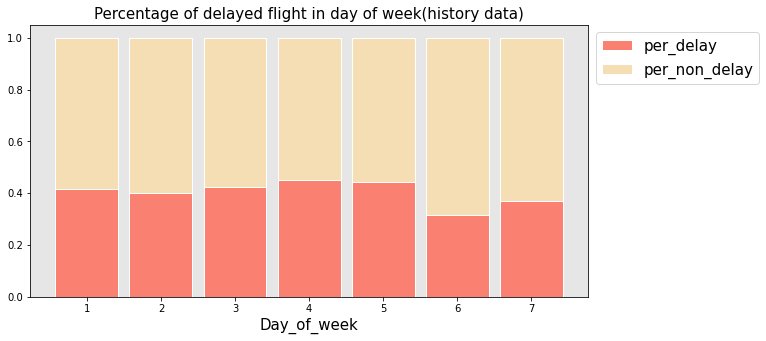

In [ ]:
# Percentage seems a better indicator
temp3 = bar_plot(flight_history,'day_of_week')
barWidth = 0.85
plt.figure(figsize=(10,5))
plt.axes(facecolor='#E6E6E6')
#plt.axes(facecolor='#E6E6E6')
r = list(temp3['day_of_week'].astype(int)) 
names = list(temp3['day_of_week'].astype(int))
names = [x+1 for x in names]
plt.bar(r, list(temp3['per_delay']), color='salmon', edgecolor='white', width=barWidth,label='per_delay')
plt.bar(r, list(temp3['per_non_delay']), bottom=list(temp3['per_delay']), color='wheat', edgecolor='white', width=barWidth,
        label='per_non_delay')
plt.xticks(r, names)
plt.xlabel("Day_of_week",fontsize=15)
plt.title('Percentage of delayed flight in day of week(history data)',fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1,fontsize=15)
#plt.tight_layout()
plt.show()

In [ ]:
flight_test.groupby('day_of_week').count()

,uniqueid,year,month,day,sched_dep_time,sched_arr_time,carrier,flight,tailnum,origin,dest,hour,minute,time_hour,lateflight
day_of_week,,,,,,,,,,,,,,,
0,1044,1044,1044,1044,1044,1044,1044,1044,1027,1044,1044,1044,1044,1044,977
1,1029,1029,1029,1029,1029,1029,1029,1029,1026,1029,1029,1029,1029,1029,993
2,1016,1016,1016,1016,1016,1016,1016,1016,1009,1016,1016,1016,1016,1016,987
3,765,765,765,765,765,765,765,765,757,765,765,765,765,765,738
4,768,768,768,768,768,768,768,768,766,768,768,768,768,768,756
5,667,667,667,667,667,667,667,667,665,667,667,667,667,667,652
6,711,711,711,711,711,711,711,711,698,711,711,711,711,711,683


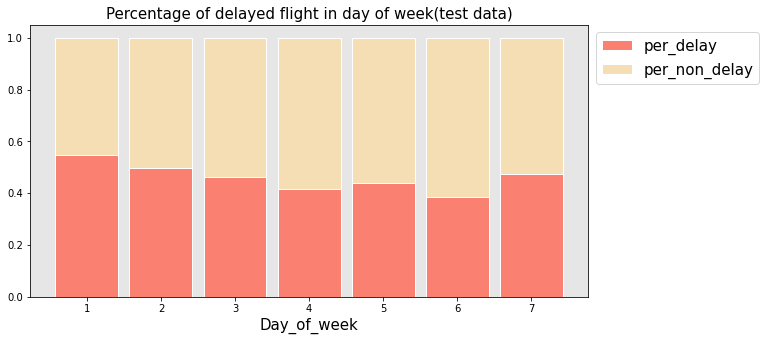

In [ ]:
temp1 = flight_test[['day_of_week','lateflight']].groupby('day_of_week').count().reset_index()
temp2 = flight_test[['day_of_week','lateflight']].groupby('day_of_week').sum().reset_index().rename(columns={'lateflight':'num_delay'})
temp3 = pd.concat([temp1,temp2[['num_delay']]],axis=1)
temp3['per_delay'] = temp3.num_delay/temp3.lateflight
temp3['per_non_delay'] = 1-temp3.per_delay
#temp3 = bar_plot(flight_test,'day')
temp3_day_of_week = temp3
barWidth = 0.85
plt.figure(figsize=(10,5))
plt.axes(facecolor='#E6E6E6')
#plt.axes(facecolor='#E6E6E6')
r = list(temp3_day_of_week['day_of_week'].astype(int)) 
names = list(temp3_day_of_week['day_of_week'].astype(int))
names = [x+1 for x in names]
plt.bar(r, list(temp3_day_of_week['per_delay']), color='salmon', edgecolor='white', width=barWidth,label='per_delay')
plt.bar(r, list(temp3_day_of_week['per_non_delay']), bottom=list(temp3_day_of_week['per_delay']), color='wheat', edgecolor='white', width=barWidth,
        label='per_non_delay')
plt.xticks(r, names)
plt.xlabel("Day_of_week",fontsize=15)
plt.title('Percentage of delayed flight in day of week(test data)',fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1,fontsize=15)
#plt.tight_layout()
plt.show()

In [ ]:
flight_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166158 entries, 0 to 166157
Data columns (total 21 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   year                                                166158 non-null  int64         
 1   month                                               166158 non-null  int64         
 2   day                                                 166158 non-null  int64         
 3   dep_time                                            161275 non-null  float64       
 4   sched_dep_time                                      166158 non-null  int64         
 5   dep_delay                                           161275 non-null  float64       
 6   arr_time                                            161057 non-null  float64       
 7   sched_arr_time                                      166158 non-null  int64         

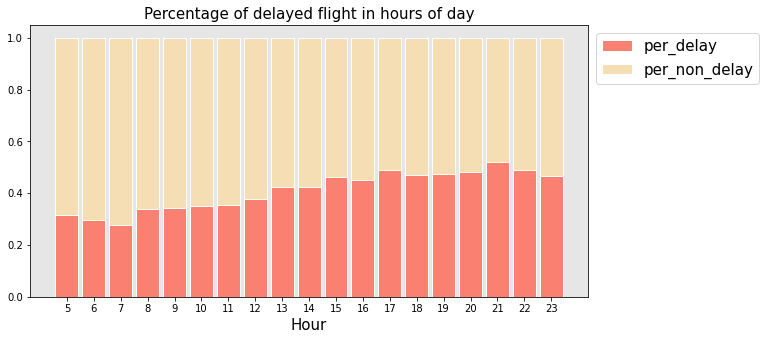

In [ ]:
temp3_hour = bar_plot(flight_history,'hour')
barWidth = 0.85
plt.figure(figsize=(10,5))
plt.axes(facecolor='#E6E6E6')
#plt.axes(facecolor='#E6E6E6')
r = list(temp3_hour['hour'].astype(int)) 
names = list(temp3_hour['hour'].astype(int))
plt.bar(r, list(temp3_hour['per_delay']), color='salmon', edgecolor='white', width=barWidth,label='per_delay')
plt.bar(r, list(temp3_hour['per_non_delay']), bottom=list(temp3_hour['per_delay']), color='wheat', edgecolor='white', width=barWidth,
        label='per_non_delay')
plt.xticks(r, names)
plt.xlabel("Hour",fontsize=15)
plt.title('Percentage of delayed flight in hours of day',fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1,fontsize=15)
#plt.tight_layout()
plt.show()

In [ ]:
flight_history.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time(length of flight spent in air in minutes),distance,hour,minute,time_hour,delay,day_of_week
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0,1
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0,1


**EDA from place&other angle**

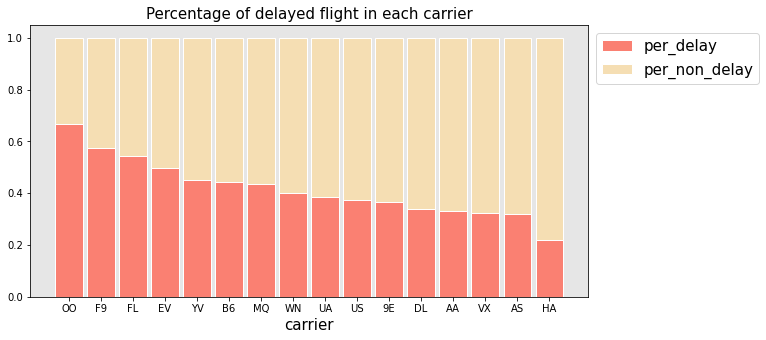

In [ ]:
temp3_ca = bar_plot(flight_history,'carrier')
temp3_ca = temp3_ca.sort_values(by=['per_delay'], ascending=False).reset_index(drop=True)
barWidth = 0.85
plt.figure(figsize=(10,5))
plt.axes(facecolor='#E6E6E6')
r = list(temp3_ca.index.astype(int)) 
names = list(temp3_ca['carrier'])
plt.bar(r, list(temp3_ca['per_delay']), color='salmon', edgecolor='white', width=barWidth,label='per_delay')
plt.bar(r, list(temp3_ca['per_non_delay']), bottom=list(temp3_ca['per_delay']), color='wheat', edgecolor='white', width=barWidth,
        label='per_non_delay')
plt.xticks(r, names)
plt.xlabel("carrier",fontsize=15)
plt.title('Percentage of delayed flight in each carrier',fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1,fontsize=15)
#plt.tight_layout()
plt.show()

In [ ]:
flight_history.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time(length of flight spent in air in minutes),distance,hour,minute,time_hour,delay,day_of_week
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0,1
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0,1


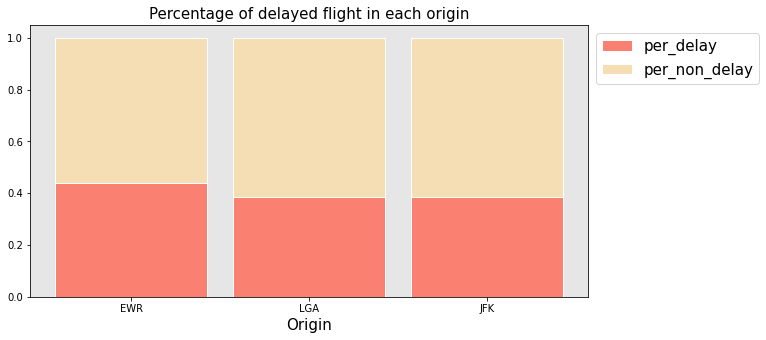

In [ ]:
temp3_origin = bar_plot(flight_history,'origin')
temp3_origin = temp3_origin.sort_values(by=['per_delay'], ascending=False).reset_index(drop=True)
barWidth = 0.85
plt.figure(figsize=(10,5))
plt.axes(facecolor='#E6E6E6')
r = list(temp3_origin.index.astype(int)) 
names = list(temp3_origin['origin'])
plt.bar(r, list(temp3_origin['per_delay']), color='salmon', edgecolor='white', width=barWidth,label='per_delay')
plt.bar(r, list(temp3_origin['per_non_delay']), bottom=list(temp3_origin['per_delay']), color='wheat', edgecolor='white', width=barWidth,
        label='per_non_delay')
plt.xticks(r, names)
plt.xlabel("Origin",fontsize=15)
plt.title('Percentage of delayed flight in each origin',fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1,fontsize=15)
#plt.tight_layout()
plt.show()

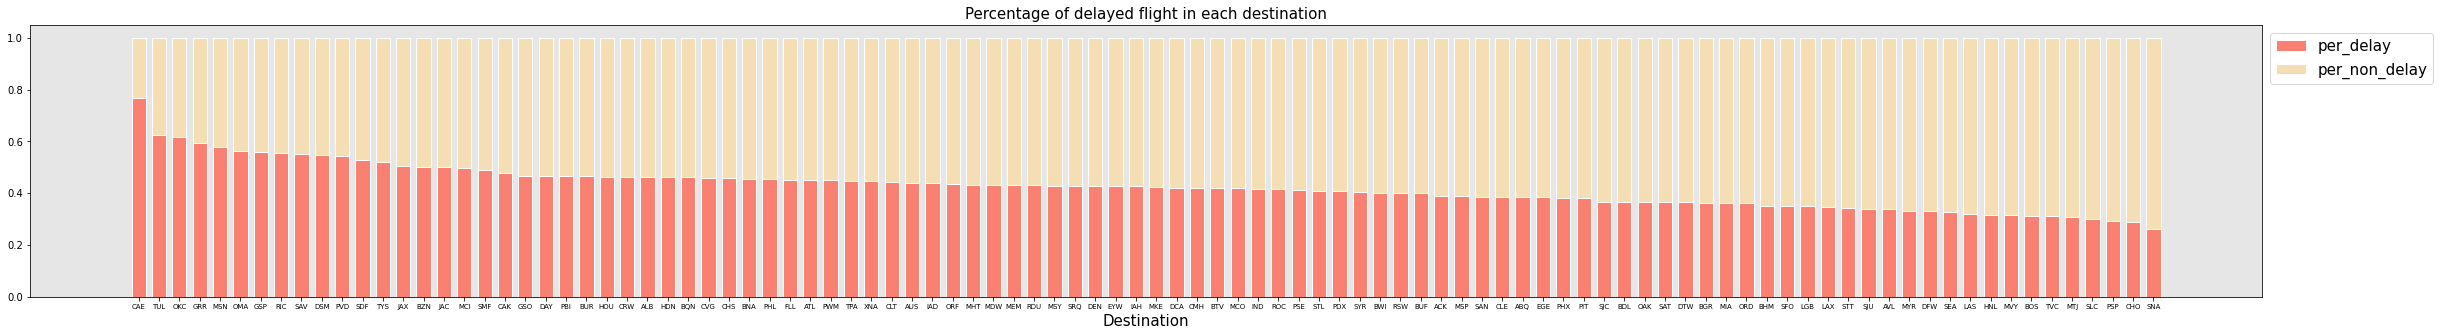

In [ ]:
temp3_des = bar_plot(flight_history,'dest')
temp3_des = temp3_des.sort_values(by=['per_delay'], ascending=False).reset_index(drop=True)
barWidth = 0.7
plt.figure(figsize=(40,5))
plt.axes(facecolor='#E6E6E6')
r = list(temp3_des.index.astype(int)) 
names = list(temp3_des['dest'])
plt.bar(r, list(temp3_des['per_delay']), color='salmon', edgecolor='white', width=barWidth,label='per_delay')
plt.bar(r, list(temp3_des['per_non_delay']), bottom=list(temp3_des['per_delay']), color='wheat', edgecolor='white', width=barWidth,
        label='per_non_delay')
plt.xticks(r, names,fontsize=7)
plt.xlabel("Destination",fontsize=15)
plt.title('Percentage of delayed flight in each destination',fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1,fontsize=15)
#plt.tight_layout()
plt.show()

In [ ]:
flight_history.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time(length of flight spent in air in minutes),distance,hour,minute,time_hour,delay,day_of_week
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0,1
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0,1


In [ ]:
planes['age'] = 2022-planes['year']
planes.drop('year', inplace = True, axis = 1)

In [ ]:
planes.head()

,tailnum,type,manufacturer,model,engines,seats,speed,engine,age
0,N10156,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan,18.0
1,N102UW,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,24.0
2,N103US,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,23.0
3,N104UW,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,23.0
4,N10575,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan,20.0


In [ ]:
his_planes = flight_history.merge(planes, left_on = 'tailnum', right_on = 'tailnum')

In [ ]:
his_planes.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,delay,day_of_week,type,manufacturer,model,engines,seats,speed,engine,age
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,1,1,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0
1,2013,1,8,1435.0,1440,-5.0,1717.0,1746,-29.0,UA,...,0,1,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0
2,2013,1,9,717.0,700,17.0,812.0,815,-3.0,UA,...,0,2,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0
3,2013,1,9,1143.0,1144,-1.0,1425.0,1445,-20.0,UA,...,0,2,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0
4,2013,1,13,835.0,824,11.0,1030.0,951,39.0,UA,...,1,6,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0


In [ ]:
#DELETE THIS CELL
his_planes.info()
# There is no NA value for distance column but there are a small number of NA value for air_time
# We need to remove these rows with air time is NA or the speed will be zero when calculating.
his_planes.drop

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139502 entries, 0 to 139501
Data columns (total 30 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   year                                                139502 non-null  int64         
 1   month                                               139502 non-null  int64         
 2   day                                                 139502 non-null  int64         
 3   dep_time                                            136970 non-null  float64       
 4   sched_dep_time                                      139502 non-null  int64         
 5   dep_delay                                           136970 non-null  float64       
 6   arr_time                                            136793 non-null  float64       
 7   sched_arr_time                                      139502 non-null  int64         

No handles with labels found to put in legend.


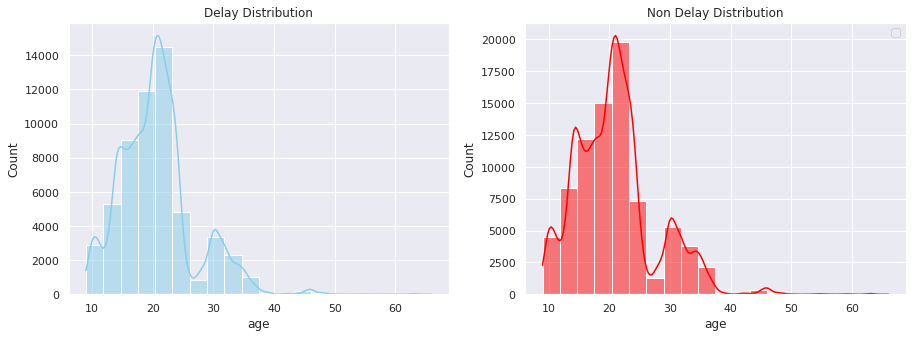

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
fig, axs = plt.subplots(1,2, figsize=(15, 5))
#his_planes[['delay','age']][his_planes['delay'] == 1]
sns.histplot(ax=axs[0],data=his_planes[['delay','age']][his_planes['delay'] == 1],
             x="age", color="skyblue", kde=True,bins=20)
axs[0].set_title('Delay Distribution')
sns.histplot(ax=axs[1],data=his_planes[['delay','age']][his_planes['delay'] == 0]
             , x="age", color="red", kde=True,bins=20)
axs[1].set_title('Non Delay Distribution')
plt.legend() 
plt.show()

In [ ]:
his_planes.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,delay,day_of_week,type,manufacturer,model,engines,seats,speed,engine,age
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,1,1,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0
1,2013,1,8,1435.0,1440,-5.0,1717.0,1746,-29.0,UA,...,0,1,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0
2,2013,1,9,717.0,700,17.0,812.0,815,-3.0,UA,...,0,2,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0
3,2013,1,9,1143.0,1144,-1.0,1425.0,1445,-20.0,UA,...,0,2,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0
4,2013,1,13,835.0,824,11.0,1030.0,951,39.0,UA,...,1,6,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0


Planes dataset contains speed feature, but most of the value in that column is just NA, so here i need to create speed feature myself(km/h) from air time and distance. Note that one tailnum have different pair of air time and distance, here calculate the speed for each pair, then take average for each tailnum.

In [ ]:
# multiple distance with 1.609344 is to transfer miles to km
his_planes['speed(km/h)'] = (his_planes['distance']*1.609344) / (his_planes['air_time(length of flight spent in air in minutes)']/60)


In [ ]:
his_planes.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,day_of_week,type,manufacturer,model,engines,seats,speed,engine,age,speed(km/h)
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,1,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0,595.528176
1,2013,1,8,1435.0,1440,-5.0,1717.0,1746,-29.0,UA,...,1,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0,698.455296
2,2013,1,9,717.0,700,17.0,812.0,815,-3.0,UA,...,2,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0,495.182769
3,2013,1,9,1143.0,1144,-1.0,1425.0,1445,-20.0,UA,...,2,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0,646.113813
4,2013,1,13,835.0,824,11.0,1030.0,951,39.0,UA,...,6,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan,23.0,449.119256


Text(0.5, 1.0, 'Delay dis-seats')

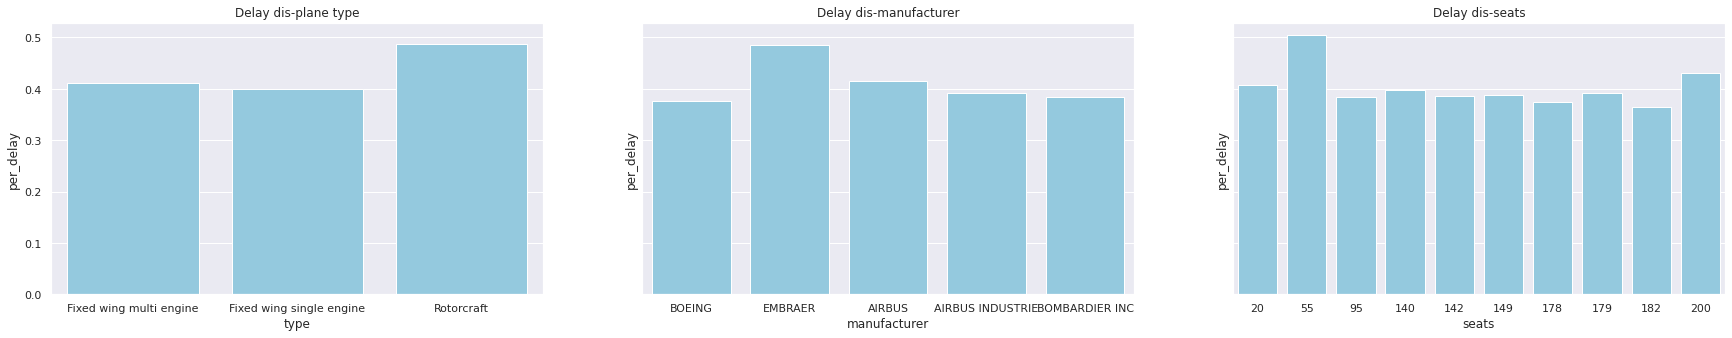

In [ ]:
temp1 = his_planes[['type','delay']].groupby('type').sum().reset_index().rename(columns = {'delay':'num_delay'})
temp1['per_delay'] = temp1.num_delay/his_planes[['type','delay']].groupby('type').count().reset_index()['delay']
temp1
temp2 = his_planes[['manufacturer','delay']].groupby('manufacturer').sum().reset_index().rename(columns = {'delay':'num_delay'})
temp2['per_delay'] = temp2.num_delay/his_planes[['manufacturer','delay']].groupby('manufacturer').count().reset_index()['delay']
temp2 = temp2.merge(his_planes[['manufacturer','delay']].groupby('manufacturer').count().reset_index().rename(columns={'delay':'count'})
,left_on='manufacturer',right_on='manufacturer')
temp2 = temp2.sort_values(by=['count'],ascending=False).iloc[0:5,:]

temp3 = his_planes[['seats','delay']].groupby('seats').sum().reset_index().rename(columns = {'delay':'num_delay'})
temp3['per_delay'] = temp3.num_delay/his_planes[['seats','delay']].groupby('seats').count().reset_index()['delay']
temp3 = temp3.merge(his_planes[['seats','delay']].groupby('seats').count().reset_index().rename(columns={'delay':'count'})
,left_on='seats',right_on='seats')
temp3 = temp3.sort_values(by=['count'],ascending=False).iloc[0:10,:]

#top 5 manufacturer take more than 95% of the entire dataset
fig, axes = plt.subplots(1, 3, figsize=(30, 5), sharey=True)
#fig.suptitle('Initial Pokemon - 1st Generation')
sns.barplot(ax=axes[0], x=temp1['type'], y=temp1['per_delay'],color="skyblue")
axes[0].set_title("Delay dis-plane type")
sns.barplot(ax=axes[1], x=temp2['manufacturer'], y=temp2['per_delay'],color="skyblue")
axes[1].set_title("Delay dis-manufacturer")
sns.barplot(ax=axes[2], x=temp3['seats'], y=temp3['per_delay'],color="skyblue")
axes[2].set_title("Delay dis-seats")

In [ ]:
temp3

,seats,num_delay,per_delay,count
13,55,13641,0.503897,27071
32,200,9962,0.431031,23112
24,149,4761,0.387262,12294
26,178,4266,0.373621,11418
11,20,4623,0.408176,11326
28,182,2690,0.365092,7368
27,179,2325,0.391480,5939
20,140,2107,0.398374,5289
15,95,1933,0.384141,5032
21,142,1750,0.385208,4543


In [ ]:
his_planes.groupby('seats').count().reset_index().sort_values(by=['year'],ascending=False).iloc[0:10,:]

,seats,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,delay,day_of_week,type,manufacturer,model,engines,speed,engine,age,speed(km/h)
13,55,27071,27071,27071,25725,27071,25725,25660,27071,25580,...,27071,27071,27071,27071,27071,27071,0,27071,26479,25580
32,200,23112,23112,23112,22954,23112,22954,22938,23112,22886,...,23112,23112,23112,23112,23112,23112,0,23112,22887,22886
24,149,12294,12294,12294,12258,12294,12258,12247,12294,12217,...,12294,12294,12294,12294,12294,12294,0,12294,11785,12217
26,178,11418,11418,11418,11361,11418,11361,11352,11418,11337,...,11418,11418,11418,11418,11418,11418,0,11418,11418,11337
11,20,11326,11326,11326,11182,11326,11182,11170,11326,11160,...,11326,11326,11326,11326,11326,11326,0,11326,11014,11160
28,182,7368,7368,7368,7312,7368,7312,7311,7368,7304,...,7368,7368,7368,7368,7368,7368,0,7368,7328,7304
27,179,5939,5939,5939,5939,5939,5939,5924,5939,5914,...,5939,5939,5939,5939,5939,5939,0,5939,5905,5914
20,140,5289,5289,5289,5184,5289,5184,5182,5289,5167,...,5289,5289,5289,5289,5289,5289,0,5289,5187,5167
15,95,5032,5032,5032,5005,5032,5005,4989,5032,4962,...,5032,5032,5032,5032,5032,5032,0,5032,5030,4962
21,142,4543,4543,4543,4493,4543,4493,4492,4543,4479,...,4543,4543,4543,4543,4543,4543,0,4543,4536,4479


No handles with labels found to put in legend.


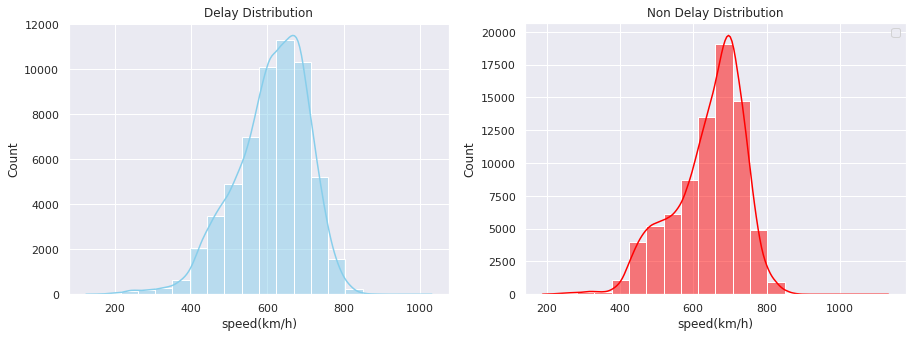

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1,2, figsize=(15, 5))
#his_planes[['delay','age']][his_planes['delay'] == 1]
sns.histplot(ax=axs[0],data=his_planes[['delay','speed(km/h)']][his_planes['delay'] == 1],
             x="speed(km/h)", color="skyblue", kde=True,bins=20)
axs[0].set_title('Delay Distribution')
sns.histplot(ax=axs[1],data=his_planes[['delay','speed(km/h)']][his_planes['delay'] == 0]
             , x="speed(km/h)", color="red", kde=True,bins=20)
axs[1].set_title('Non Delay Distribution')
plt.legend() 
plt.show()

# Append new features to flight test dataset

In [ ]:
# Append % of all flights for that carrier that are delayed.(key is carrier)
temp3_ca.rename(columns={'per_delay':'per_delay(carrier)'},inplace=True)
fli_test = flight_test.merge(temp3_ca[['carrier','per_delay(carrier)']],left_on='carrier',right_on='carrier')

In [ ]:
# Append distance between origin and destination to flight test dataset(key is origin-dest)
fli_test['origin_dest'] = fli_test['origin'] + '-' + fli_test['dest']
flight_history['origin_dest'] = flight_history['origin'] + '-' + flight_history['dest']
fli_test = fli_test.merge(flight_history.groupby('origin_dest').mean().reset_index()[['origin_dest','distance']]
                          ,left_on='origin_dest',right_on='origin_dest',how='left')

In [ ]:
# Append Speed of planes to flight test dataset(key is tailnum)
his_planes.groupby('tailnum').mean().reset_index()[['tailnum','speed(km/h)']]
fli_test = fli_test.merge(his_planes.groupby('tailnum').mean().reset_index()[['tailnum','speed(km/h)']],
                          left_on = 'tailnum',right_on='tailnum',how='left')

In [ ]:
# Append % of all flights for that hour that are delayed(key is hour)
temp3_hour.rename(columns={'per_delay':'per_delay(hour)'},inplace=True)
fli_test = fli_test.merge(temp3_hour[['hour','per_delay(hour)']],left_on='hour',right_on='hour')

In [ ]:
fli_test.head()

,uniqueid,year,month,day,sched_dep_time,sched_arr_time,carrier,flight,tailnum,origin,...,hour,minute,time_hour,lateflight,day_of_week,per_delay(carrier),origin_dest,distance,speed(km/h),per_delay(hour)
0,1,2013,7,14,1440,1749,DL,1902,N965DL,LGA,...,14,40,2013-07-14 14:00:00,0.0,6,0.340939,LGA-PBI,1035.0,665.293037,0.426008
1,71,2013,7,28,1455,1630,DL,1164,N360NB,JFK,...,14,55,2013-07-28 14:00:00,0.0,6,0.340939,JFK-BOS,187.0,627.319439,0.426008
2,192,2013,7,15,1455,1630,DL,1164,N710TW,JFK,...,14,55,2013-07-15 14:00:00,0.0,0,0.340939,JFK-BOS,187.0,710.426803,0.426008
3,238,2013,7,7,1455,1630,DL,1164,N339NB,JFK,...,14,55,2013-07-07 14:00:00,1.0,6,0.340939,JFK-BOS,187.0,647.052526,0.426008
4,325,2013,7,31,1459,1827,DL,161,N186DN,JFK,...,14,59,2013-07-31 14:00:00,1.0,2,0.340939,JFK-SEA,2422.0,676.806333,0.426008


**Append weather data into flight test**

In [ ]:
# to append weather data, the key should be concat valid and station(valid is time and station is location)

In [ ]:
flight_history.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time(length of flight spent in air in minutes),distance,hour,minute,time_hour,delay,day_of_week,origin_dest
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1,1,EWR-IAH
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1,1,LGA-IAH
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1,1,JFK-MIA
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0,1,JFK-BQN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0,1,LGA-ATL


In [ ]:
flight_history['departure_time_dest'] = flight_history['time_hour'].astype(str) + flight_history['dest']

In [ ]:
flight_history['departure_time_origin'] = flight_history['time_hour'].astype(str) + flight_history['origin']

In [ ]:
wea_dest_his_keep['departure_time_dest'] = wea_dest_his_keep['valid'].astype(str) + wea_dest_his_keep['station']

In [ ]:
wea_origin_keep['departure_time_origin'] = wea_origin_keep['valid'].astype(str) + wea_origin_keep['station']

In [ ]:
his_wea_dest_distribution = flight_history[['departure_time_dest','delay']].merge(wea_dest_his_keep,
                                                                                 left_on='departure_time_dest',
                                                                                 right_on='departure_time_dest',
                                                                                 how='inner')

In [ ]:
his_wea_origin_distribution = flight_history[['departure_time_origin','delay']].merge(wea_origin_keep,
                                                                                 left_on='departure_time_origin',
                                                                                 right_on='departure_time_origin',
                                                                                 how='inner')

In [ ]:
his_wea_origin_distribution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166022 entries, 0 to 166021
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   departure_time_origin  166022 non-null  object        
 1   delay                  166022 non-null  int64         
 2   station                166022 non-null  object        
 3   valid                  166022 non-null  datetime64[ns]
 4   lon                    166022 non-null  float64       
 5   lat                    166022 non-null  float64       
 6   tmpf                   166022 non-null  float64       
 7   dwpf                   166022 non-null  float64       
 8   relh                   166006 non-null  float64       
 9   drct                   163129 non-null  float64       
 10  sknt                   165973 non-null  float64       
 11  vsby                   166022 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), 

No handles with labels found to put in legend.


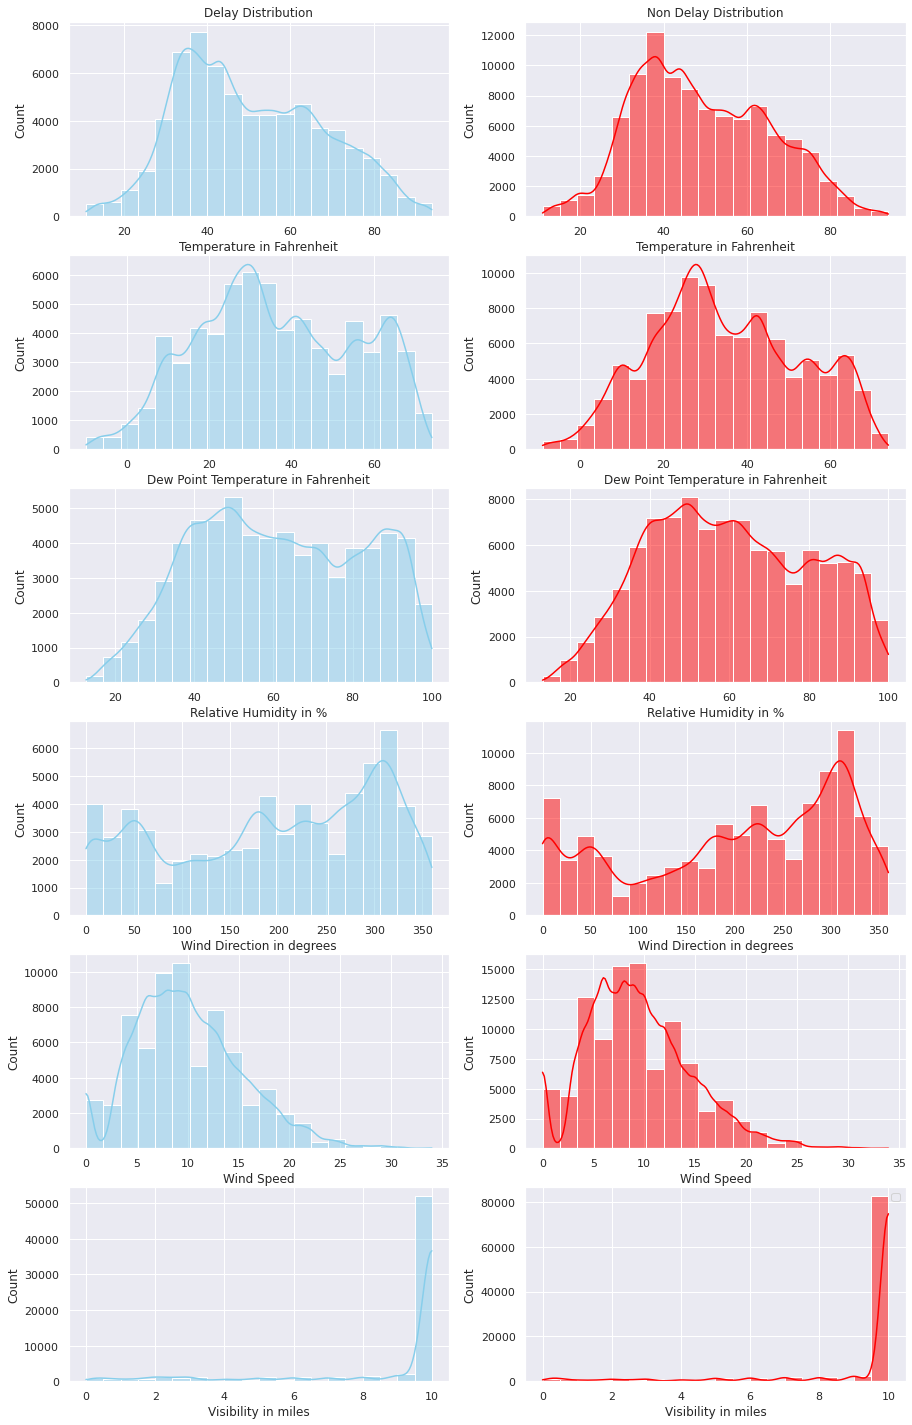

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(6,2, figsize=(15, 25))
#his_planes[['delay','age']][his_planes['delay'] == 1]
sns.histplot(ax=axs[0,0],data=his_wea_origin_distribution[['delay','tmpf']][his_wea_origin_distribution['delay'] == 1],
             x="tmpf", color="skyblue", kde=True,bins=20)
axs[0,0].set_xlabel('Temperature in Fahrenheit')
axs[0,0].set_title('Delay Distribution')
sns.histplot(ax=axs[0,1],data=his_wea_origin_distribution[['delay','tmpf']][his_wea_origin_distribution['delay'] == 0]
             , x="tmpf", color="red", kde=True,bins=20)
axs[0,1].set_xlabel('Temperature in Fahrenheit')
axs[0,1].set_title('Non Delay Distribution')

sns.histplot(ax=axs[1,0],data=his_wea_origin_distribution[['delay','dwpf']][his_wea_origin_distribution['delay'] == 1],
             x="dwpf", color="skyblue", kde=True,bins=20)
sns.histplot(ax=axs[1,1],data=his_wea_origin_distribution[['delay','dwpf']][his_wea_origin_distribution['delay'] == 0]
             , x="dwpf", color="red", kde=True,bins=20)
axs[1,0].set_xlabel('Dew Point Temperature in Fahrenheit')
axs[1,1].set_xlabel('Dew Point Temperature in Fahrenheit')

sns.histplot(ax=axs[2,0],data=his_wea_origin_distribution[['delay','relh']][his_wea_origin_distribution['delay'] == 1],
             x="relh", color="skyblue", kde=True,bins=20)
sns.histplot(ax=axs[2,1],data=his_wea_origin_distribution[['delay','relh']][his_wea_origin_distribution['delay'] == 0]
             , x="relh", color="red", kde=True,bins=20)
axs[2,0].set_xlabel('Relative Humidity in %')
axs[2,1].set_xlabel('Relative Humidity in %')


sns.histplot(ax=axs[3,0],data=his_wea_origin_distribution[['delay','drct']][his_wea_origin_distribution['delay'] == 1],
             x="drct", color="skyblue", kde=True,bins=20)
sns.histplot(ax=axs[3,1],data=his_wea_origin_distribution[['delay','drct']][his_wea_origin_distribution['delay'] == 0]
             , x="drct", color="red", kde=True,bins=20)
axs[3,0].set_xlabel('Wind Direction in degrees')
axs[3,1].set_xlabel('Wind Direction in degrees')

sns.histplot(ax=axs[4,0],data=his_wea_origin_distribution[['delay','sknt']][his_wea_origin_distribution['delay'] == 1],
             x="sknt", color="skyblue", kde=True,bins=20)
sns.histplot(ax=axs[4,1],data=his_wea_origin_distribution[['delay','sknt']][his_wea_origin_distribution['delay'] == 0]
             , x="sknt", color="red", kde=True,bins=20)
axs[4,0].set_xlabel('Wind Speed')
axs[4,1].set_xlabel('Wind Speed')

sns.histplot(ax=axs[5,0],data=his_wea_origin_distribution[['delay','vsby']][his_wea_origin_distribution['delay'] == 1],
             x="vsby", color="skyblue", kde=True,bins=20)
sns.histplot(ax=axs[5,1],data=his_wea_origin_distribution[['delay','vsby']][his_wea_origin_distribution['delay'] == 0]
             , x="vsby", color="red", kde=True,bins=20)
axs[5,0].set_xlabel('Visibility in miles')
axs[5,1].set_xlabel('Visibility in miles')

plt.legend() 
plt.show()

In [ ]:
fli_test['time_hour'] = pd.to_datetime(fli_test['time_hour'])

In [ ]:
fli_test = fli_test.merge(wea_origin_keep[['station','lon','lat']].groupby('station').mean().
                          reset_index().rename(columns={'lon':'origin_lon','lat':'origin_lat'}),
                          left_on='origin',right_on='station')

In [ ]:
temp_his = wea_dest_his_keep[['station','lon','lat']].groupby('station').mean().reset_index()
temp_tes = wea_dest_tes_keep[['station','lon','lat']].groupby('station').mean().reset_index()
temp_des = pd.concat([temp_his,temp_tes])
des_location = temp_des.groupby('station').mean().reset_index().rename(columns={'lon':'des_lon','lat':'des_lat'})
des_location

,station,des_lon,des_lat
0,ABQ,-106.6155,35.0419
1,ACK,-70.0603,41.2531
2,ALB,-73.8036,42.7576
3,ATL,-84.4418,33.6301
4,AUS,-97.6699,30.1945
...,...,...,...
90,TPA,-82.5403,27.9619
91,TUL,-95.8881,36.1984
92,TVC,-85.5824,44.7416
93,TYS,-83.9858,35.8181


In [ ]:
fli_test = fli_test.merge(des_location,left_on='dest',right_on='station',how='left')

In [ ]:
fli_test = fli_test.merge(planes[['tailnum','seats']].groupby('tailnum').mean().reset_index(),left_on='tailnum',
                          right_on='tailnum',how='left')

In [ ]:
fli_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   uniqueid            6000 non-null   int64         
 1   year                6000 non-null   int64         
 2   month               6000 non-null   int64         
 3   day                 6000 non-null   int64         
 4   sched_dep_time      6000 non-null   int64         
 5   sched_arr_time      6000 non-null   int64         
 6   carrier             6000 non-null   object        
 7   flight              6000 non-null   int64         
 8   tailnum             5948 non-null   object        
 9   origin              6000 non-null   object        
 10  dest                6000 non-null   object        
 11  hour                6000 non-null   int64         
 12  minute              6000 non-null   int64         
 13  time_hour           6000 non-null   datetime64[n

In [ ]:
fli_test['departure_time_origin'] = fli_test['time_hour'].astype(str) + fli_test['origin']

In [ ]:
fli_test.head()

,uniqueid,year,month,day,sched_dep_time,sched_arr_time,carrier,flight,tailnum,origin,...,speed(km/h),per_delay(hour),station_x,origin_lon,origin_lat,station_y,des_lon,des_lat,seats,departure_time_origin
0,1,2013,7,14,1440,1749,DL,1902,N965DL,LGA,...,665.293037,0.426008,LGA,-73.8803,40.7794,PBI,-80.0994,26.6847,142.0,2013-07-14 14:00:00LGA
1,607,2013,7,3,1439,1640,DL,1819,N976DL,LGA,...,666.530561,0.426008,LGA,-73.8803,40.7794,MSP,-93.2313,44.8854,142.0,2013-07-03 14:00:00LGA
2,691,2013,7,10,1440,1643,DL,1231,N360NB,LGA,...,627.319439,0.426008,LGA,-73.8803,40.7794,DTW,-83.3300,42.2300,145.0,2013-07-10 14:00:00LGA
3,853,2013,7,29,1440,1749,DL,1902,N910DE,LGA,...,653.286426,0.426008,LGA,-73.8803,40.7794,PBI,-80.0994,26.6847,142.0,2013-07-29 14:00:00LGA
4,926,2013,7,3,1440,1749,DL,1902,N931DL,LGA,...,665.134563,0.426008,LGA,-73.8803,40.7794,PBI,-80.0994,26.6847,142.0,2013-07-03 14:00:00LGA


In [ ]:
wea_origin_keep[['tmpf','dwpf','relh','drct','sknt','vsby','departure_time_origin']].head()

,tmpf,dwpf,relh,drct,sknt,vsby,departure_time_origin
0,37.04,21.92,53.97,230.0,9.0,10.0,2013-01-01 00:00:00EWR
1,37.04,21.92,53.97,230.0,12.0,10.0,2013-01-01 01:00:00EWR
2,37.94,21.92,52.09,230.0,11.0,10.0,2013-01-01 02:00:00EWR
3,37.94,23.00,54.51,230.0,12.0,10.0,2013-01-01 03:00:00EWR
4,37.94,24.08,57.04,240.0,13.0,10.0,2013-01-01 04:00:00EWR


In [ ]:
#fli_test.drop(['station_x','station_y'],axis=1,inplace=True)

In [ ]:
temp3_des.rename(columns={'per_delay':'per_delay(destination)'},inplace=True)

In [ ]:
temp3_des

,dest,delay,num_delay,per_delay(destination),per_non_delay
0,CAE,52,40,0.769231,0.230769
1,TUL,158,99,0.626582,0.373418
2,OKC,167,103,0.616766,0.383234
3,GRR,429,255,0.594406,0.405594
4,MSN,193,112,0.580311,0.419689
...,...,...,...,...,...
95,MTJ,13,4,0.307692,0.692308
96,SLC,1239,370,0.298628,0.701372
97,PSP,17,5,0.294118,0.705882
98,CHO,31,9,0.290323,0.709677


In [ ]:
fli_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   uniqueid               6000 non-null   int64         
 1   year                   6000 non-null   int64         
 2   month                  6000 non-null   int64         
 3   day                    6000 non-null   int64         
 4   sched_dep_time         6000 non-null   int64         
 5   sched_arr_time         6000 non-null   int64         
 6   carrier                6000 non-null   object        
 7   flight                 6000 non-null   int64         
 8   tailnum                5948 non-null   object        
 9   origin                 6000 non-null   object        
 10  dest                   6000 non-null   object        
 11  hour                   6000 non-null   int64         
 12  minute                 6000 non-null   int64         
 13  tim

In [ ]:
fli_test = fli_test.merge(wea_origin_keep[['tmpf','dwpf','relh','drct','sknt','vsby','departure_time_origin']],
                          left_on='departure_time_origin',right_on='departure_time_origin',how='left')

In [ ]:
fli_test = fli_test.merge(temp3_des[['dest','per_delay(destination)']],left_on='dest',right_on='dest',how='left')

In [ ]:
temp3_origin.rename(columns={'per_delay':'per_delay(origin)'},inplace=True)

In [ ]:
temp3_origin

,origin,delay,num_delay,per_delay(origin),per_non_delay
0,EWR,60718,26605,0.438173,0.561827
1,LGA,50074,19387,0.387167,0.612833
2,JFK,55366,21378,0.386121,0.613879


In [ ]:
fli_test = fli_test.merge(temp3_origin[['origin','per_delay(origin)']],left_on='origin',right_on='origin')

In [ ]:
fli_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uniqueid                6000 non-null   int64         
 1   year                    6000 non-null   int64         
 2   month                   6000 non-null   int64         
 3   day                     6000 non-null   int64         
 4   sched_dep_time          6000 non-null   int64         
 5   sched_arr_time          6000 non-null   int64         
 6   carrier                 6000 non-null   object        
 7   flight                  6000 non-null   int64         
 8   tailnum                 5948 non-null   object        
 9   origin                  6000 non-null   object        
 10  dest                    6000 non-null   object        
 11  hour                    6000 non-null   int64         
 12  minute                  6000 non-null   int64   

In [ ]:
temp3_day_of_week.rename(columns={'per_delay':'per_delay(day of week)'},inplace=True)

In [ ]:
temp3_day_of_week.head()

,day_of_week,lateflight,num_delay,per_delay(day of week),per_non_delay
0,0,977,534.0,0.546571,0.453429
1,1,993,492.0,0.495468,0.504532
2,2,987,457.0,0.463019,0.536981
3,3,738,308.0,0.417344,0.582656
4,4,756,332.0,0.439153,0.560847


In [ ]:
fli_test = fli_test.merge(temp3_day_of_week[['day_of_week','per_delay(day of week)']],left_on=
                          'day_of_week',right_on='day_of_week')

In [ ]:
fli_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uniqueid                6000 non-null   int64         
 1   year                    6000 non-null   int64         
 2   month                   6000 non-null   int64         
 3   day                     6000 non-null   int64         
 4   sched_dep_time          6000 non-null   int64         
 5   sched_arr_time          6000 non-null   int64         
 6   carrier                 6000 non-null   object        
 7   flight                  6000 non-null   int64         
 8   tailnum                 5948 non-null   object        
 9   origin                  6000 non-null   object        
 10  dest                    6000 non-null   object        
 11  hour                    6000 non-null   int64         
 12  minute                  6000 non-null   int64   

# Get the final dataset used to build the model

**First Try**

In [ ]:
features = ['lateflight','per_delay(carrier)','distance','speed(km/h)','per_delay(hour)','origin_lon',
            'origin_lat','des_lon','des_lat','seats']
df = fli_test[features]
df = df.fillna(df.mean())
df = pd.concat([df[df.lateflight==1],df[df.lateflight==0]])
df.reset_index(inplace=True,drop=True)

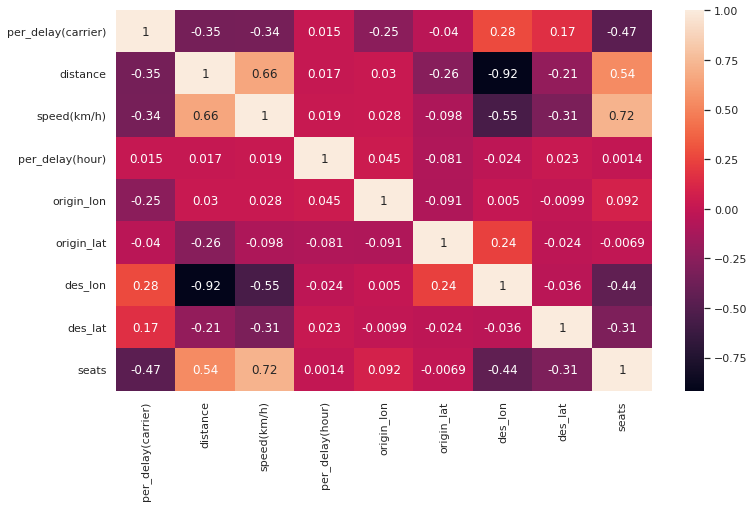

In [ ]:
corrMatrix = df.iloc[:,1:].corr()
plt.figure(figsize=(12,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5786 entries, 0 to 5785
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lateflight          5786 non-null   float64
 1   per_delay(carrier)  5786 non-null   float64
 2   distance            5786 non-null   float64
 3   speed(km/h)         5786 non-null   float64
 4   per_delay(hour)     5786 non-null   float64
 5   origin_lon          5786 non-null   float64
 6   origin_lat          5786 non-null   float64
 7   des_lon             5786 non-null   float64
 8   des_lat             5786 non-null   float64
 9   seats               5786 non-null   float64
dtypes: float64(10)
memory usage: 452.2 KB


In [ ]:
df.groupby('lateflight').count()
# total have 5786 rows of observation

,per_delay(carrier),distance,speed(km/h),per_delay(hour),origin_lon,origin_lat,des_lon,des_lat,seats
lateflight,,,,,,,,,
0.0,3088,3088,3088,3088,3088,3088,3088,3088,3088
1.0,2698,2698,2698,2698,2698,2698,2698,2698,2698


In [ ]:
import random
random.seed(10)
df_non_delay = df[df.lateflight == 0].reset_index(drop=True)
df_delay = df[df.lateflight == 1].reset_index(drop=True)
#4000*3088/5786 = 2135
#4000*2698/5786 = 1865
non_delay_index = random.sample(range(0, 3088), 2135)
delay_index = random.sample(range(0,2698),1865)
train_non_delay = df_non_delay.iloc[non_delay_index]
test_non_delay = df_non_delay[~df_non_delay.index.isin(non_delay_index)]
train_delay = df_delay.iloc[delay_index]
test_delay = df_delay[~df_delay.index.isin(delay_index)]
train_df = pd.concat([train_non_delay,train_delay]).reset_index(drop=True)
test_df = pd.concat([test_non_delay,test_delay]).reset_index(drop=True)
X_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]
X_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]

**Logistic Regression Model** 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#logistic regression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)

y_pred = model.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[1383  752]
 [ 700 1165]]
Accuracy: 0.637
              precision    recall  f1-score   support

         0.0       0.66      0.65      0.66      2135
         1.0       0.61      0.62      0.62      1865

    accuracy                           0.64      4000
   macro avg       0.64      0.64      0.64      4000
weighted avg       0.64      0.64      0.64      4000



In [ ]:
1183/(1183+682)

0.6343163538873995

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[592 361]
 [293 540]]
Accuracy: 0.6338185890257558
              precision    recall  f1-score   support

         0.0       0.67      0.62      0.64       953
         1.0       0.60      0.65      0.62       833

    accuracy                           0.63      1786
   macro avg       0.63      0.63      0.63      1786
weighted avg       0.64      0.63      0.63      1786



In [ ]:
516/(516+317)

0.6194477791116446

**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# increase max_depth can significantly increase the accuracy for training dataset but have 
# little effect on testing accuracy

model = RandomForestClassifier(max_depth=7, random_state=0,n_estimators=99) 
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[1560  575]
 [ 625 1240]]
Accuracy: 0.7
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72      2135
         1.0       0.68      0.66      0.67      1865

    accuracy                           0.70      4000
   macro avg       0.70      0.70      0.70      4000
weighted avg       0.70      0.70      0.70      4000



In [ ]:
1209/(1209+656)

0.6482573726541555

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[620 333]
 [329 504]]
Accuracy: 0.6293393057110862
              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65       953
         1.0       0.60      0.61      0.60       833

    accuracy                           0.63      1786
   macro avg       0.63      0.63      0.63      1786
weighted avg       0.63      0.63      0.63      1786



In [ ]:
491/(491+342)

0.5894357743097239

**KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

y_pred = knn.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[1554  581]
 [ 704 1161]]
Accuracy: 0.67875
              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71      2135
         1.0       0.67      0.62      0.64      1865

    accuracy                           0.68      4000
   macro avg       0.68      0.68      0.68      4000
weighted avg       0.68      0.68      0.68      4000



In [ ]:
1109/(1109+756)

0.5946380697050938

In [ ]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[583 370]
 [409 424]]
Accuracy: 0.5638297872340425
              precision    recall  f1-score   support

         0.0       0.59      0.61      0.60       953
         1.0       0.53      0.51      0.52       833

    accuracy                           0.56      1786
   macro avg       0.56      0.56      0.56      1786
weighted avg       0.56      0.56      0.56      1786



In [ ]:
408/(408+425)

0.4897959183673469

**Adaboost Model**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=101, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[1488  647]
 [ 736 1129]]
Accuracy: 0.65425
              precision    recall  f1-score   support

         0.0       0.67      0.70      0.68      2135
         1.0       0.64      0.61      0.62      1865

    accuracy                           0.65      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.65      0.65      0.65      4000



In [ ]:
1141/(1141+724)

0.6117962466487936

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[642 311]
 [331 502]]
Accuracy: 0.6405375139977604
              precision    recall  f1-score   support

         0.0       0.66      0.67      0.67       953
         1.0       0.62      0.60      0.61       833

    accuracy                           0.64      1786
   macro avg       0.64      0.64      0.64      1786
weighted avg       0.64      0.64      0.64      1786



In [ ]:
480/(480+353)

0.5762304921968787

**Second Try**

In [ ]:
features = ['lateflight','per_delay(carrier)','distance','speed(km/h)','per_delay(hour)','origin_lon',
            'origin_lat','des_lon','des_lat','seats','tmpf','dwpf','relh','drct','sknt','vsby','per_delay(destination)',
            'per_delay(origin)','per_delay(day of week)']
df = fli_test[features]
df = df.fillna(df.mean())
df = pd.concat([df[df.lateflight==1],df[df.lateflight==0]])
df.reset_index(inplace=True,drop=True)

In [ ]:
df['per_delay(carrier)'] = df['per_delay(carrier)']*100
df['per_delay(hour)'] = df['per_delay(hour)']*100
df['per_delay(destination)'] = df['per_delay(destination)']*100
df['per_delay(origin)'] = df['per_delay(origin)']*100
df['per_delay(day of week)'] = df['per_delay(day of week)']*100

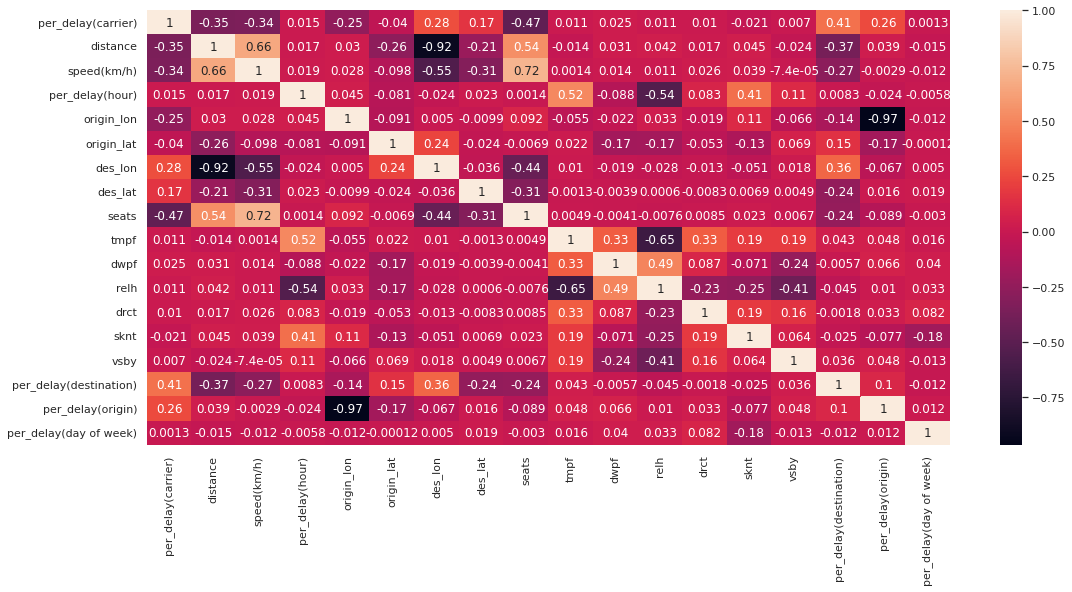

In [ ]:
corrMatrix = df.iloc[:,1:].corr()
plt.figure(figsize=(18,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df.drop('des_lon',axis=1,inplace=True)
df.drop('origin_lon',axis=1,inplace=True)

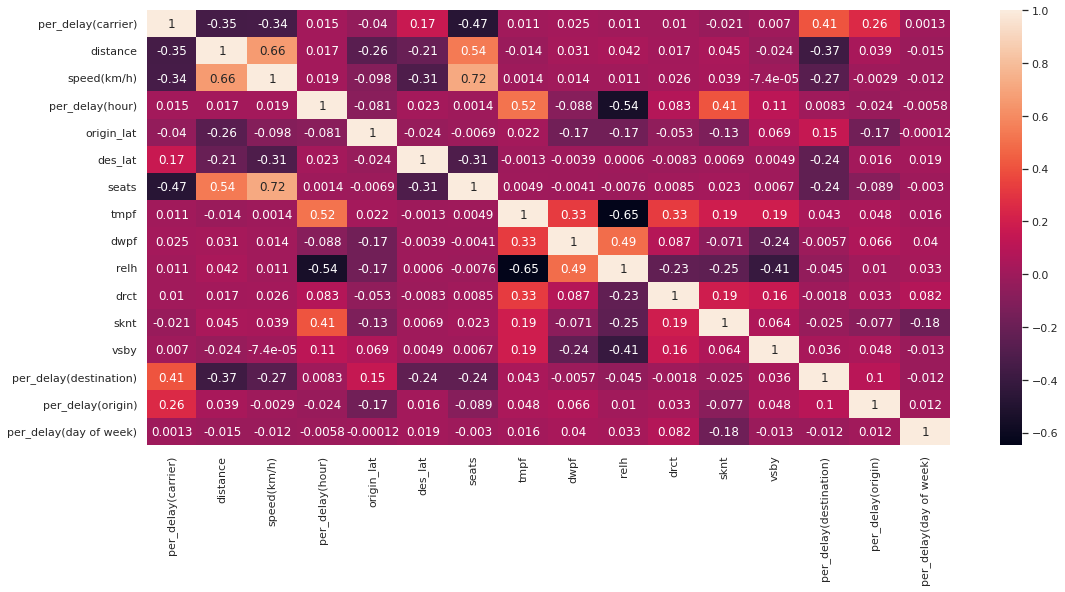

In [ ]:
corrMatrix = df.iloc[:,1:].corr()
plt.figure(figsize=(18,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df.head()

,lateflight,per_delay(carrier),distance,speed(km/h),per_delay(hour),origin_lat,des_lat,seats,tmpf,dwpf,relh,drct,sknt,vsby,per_delay(destination),per_delay(origin),per_delay(day of week)
0,1.0,34.093892,1020.0,647.517907,42.600768,40.7794,44.8854,142.0,89.06,69.08,51.83,190.0,6.0,10.0,38.913234,38.716699,47.437775
1,1.0,34.093892,502.0,632.964892,42.600768,40.7794,42.2300,145.0,89.06,69.08,51.83,190.0,6.0,10.0,36.513722,38.716699,47.437775
2,1.0,37.301195,544.0,615.965837,42.600768,40.7794,35.2225,199.0,77.00,62.06,59.98,170.0,9.0,10.0,44.431120,38.716699,47.437775
3,1.0,37.301195,544.0,609.378214,42.600768,40.7794,35.2225,379.0,84.02,69.98,62.77,270.0,8.0,10.0,44.431120,38.716699,47.437775
4,1.0,37.301195,544.0,604.072775,42.600768,40.7794,35.2225,199.0,89.06,69.08,51.83,190.0,6.0,10.0,44.431120,38.716699,47.437775


In [ ]:
import random
random.seed(10)
df_non_delay = df[df.lateflight == 0].reset_index(drop=True)
df_delay = df[df.lateflight == 1].reset_index(drop=True)
#4000*3088/5786 = 2135
#4000*2698/5786 = 1865
non_delay_index = random.sample(range(0, 3088), 2135)
delay_index = random.sample(range(0,2698),1865)
train_non_delay = df_non_delay.iloc[non_delay_index]
test_non_delay = df_non_delay[~df_non_delay.index.isin(non_delay_index)]
train_delay = df_delay.iloc[delay_index]
test_delay = df_delay[~df_delay.index.isin(delay_index)]
train_df = pd.concat([train_non_delay,train_delay]).reset_index(drop=True)
test_df = pd.concat([test_non_delay,test_delay]).reset_index(drop=True)
X_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]
X_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]

**Logistic Regression**

In [ ]:
#logistic regression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)

y_pred = model.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[1524  611]
 [ 795 1070]]
Accuracy: 0.6485
              precision    recall  f1-score   support

         0.0       0.66      0.71      0.68      2135
         1.0       0.64      0.57      0.60      1865

    accuracy                           0.65      4000
   macro avg       0.65      0.64      0.64      4000
weighted avg       0.65      0.65      0.65      4000



In [ ]:
1070/(1070+795)

0.5737265415549598

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[670 283]
 [335 498]]
Accuracy: 0.6539753639417694
              precision    recall  f1-score   support

         0.0       0.67      0.70      0.68       953
         1.0       0.64      0.60      0.62       833

    accuracy                           0.65      1786
   macro avg       0.65      0.65      0.65      1786
weighted avg       0.65      0.65      0.65      1786



In [ ]:
498/(498+335)

0.5978391356542617

**Random Forest Model**

In [ ]:
model = RandomForestClassifier(max_depth=7, random_state=0,n_estimators=201) 
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[1793  342]
 [ 571 1294]]
Accuracy: 0.77175
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80      2135
         1.0       0.79      0.69      0.74      1865

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000



In [ ]:
1294/(1294+571)

0.693833780160858

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[672 281]
 [315 518]]
Accuracy: 0.6662933930571109
              precision    recall  f1-score   support

         0.0       0.68      0.71      0.69       953
         1.0       0.65      0.62      0.63       833

    accuracy                           0.67      1786
   macro avg       0.66      0.66      0.66      1786
weighted avg       0.67      0.67      0.67      1786



In [ ]:
518/(518+315)

0.6218487394957983

**KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

y_pred = knn.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[1624  511]
 [ 561 1304]]
Accuracy: 0.732
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75      2135
         1.0       0.72      0.70      0.71      1865

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



In [ ]:
1304/(1304+561)

0.6991957104557641

In [ ]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[587 366]
 [388 445]]
Accuracy: 0.5778275475923852
              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61       953
         1.0       0.55      0.53      0.54       833

    accuracy                           0.58      1786
   macro avg       0.58      0.58      0.58      1786
weighted avg       0.58      0.58      0.58      1786



In [ ]:
445/(445+388)

0.5342136854741897

**Adaboost**

In [ ]:
model = AdaBoostClassifier(n_estimators=101, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[1589  546]
 [ 666 1199]]
Accuracy: 0.697
              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72      2135
         1.0       0.69      0.64      0.66      1865

    accuracy                           0.70      4000
   macro avg       0.70      0.69      0.69      4000
weighted avg       0.70      0.70      0.70      4000



In [ ]:
1199/(1199+666)

0.6428954423592493

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[658 295]
 [303 530]]
Accuracy: 0.6651735722284434
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69       953
         1.0       0.64      0.64      0.64       833

    accuracy                           0.67      1786
   macro avg       0.66      0.66      0.66      1786
weighted avg       0.66      0.67      0.67      1786



In [ ]:
530/(530+303)

0.6362545018007203

**Third Try(Just change the percentage of training and testing dataset)**

In [ ]:
df.groupby('lateflight').count().reset_index().rename(columns={'per_delay(carrier)':'count'})

,lateflight,count,distance,speed(km/h),per_delay(hour),origin_lon,origin_lat,des_lon,des_lat,seats
0,0.0,3088,3088,3088,3088,3088,3088,3088,3088,3088
1,1.0,2698,2698,2698,2698,2698,2698,2698,2698,2698


In [ ]:
import random
# the total number of observation is 5787
random.seed(10)
df_non_delay = df[df.lateflight == 0].reset_index(drop=True)
df_delay = df[df.lateflight == 1].reset_index(drop=True)
#5000*3088/5786 = 2669
#5000*2698/5786 = 2331
non_delay_index = random.sample(range(0, 3088), 2669)
delay_index = random.sample(range(0,2698),2331)
train_non_delay = df_non_delay.iloc[non_delay_index]
test_non_delay = df_non_delay[~df_non_delay.index.isin(non_delay_index)]
train_delay = df_delay.iloc[delay_index]
test_delay = df_delay[~df_delay.index.isin(delay_index)]
train_df = pd.concat([train_non_delay,train_delay]).reset_index(drop=True)
test_df = pd.concat([test_non_delay,test_delay]).reset_index(drop=True)
X_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]
X_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]

**Logistic Regression**

In [ ]:
#logistic regression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)

y_pred = model.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[1846  823]
 [ 948 1383]]
Accuracy: 0.6458
              precision    recall  f1-score   support

         0.0       0.66      0.69      0.68      2669
         1.0       0.63      0.59      0.61      2331

    accuracy                           0.65      5000
   macro avg       0.64      0.64      0.64      5000
weighted avg       0.64      0.65      0.64      5000



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[288 131]
 [152 215]]
Accuracy: 0.6399491094147582
              precision    recall  f1-score   support

         0.0       0.65      0.69      0.67       419
         1.0       0.62      0.59      0.60       367

    accuracy                           0.64       786
   macro avg       0.64      0.64      0.64       786
weighted avg       0.64      0.64      0.64       786



**Random Forest**

In [ ]:
model = RandomForestClassifier(max_depth=9, random_state=0,n_estimators=201) 
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[2259  410]
 [ 525 1806]]
Accuracy: 0.813
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      2669
         1.0       0.81      0.77      0.79      2331

    accuracy                           0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000



In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[306 113]
 [143 224]]
Accuracy: 0.6743002544529262
              precision    recall  f1-score   support

         0.0       0.68      0.73      0.71       419
         1.0       0.66      0.61      0.64       367

    accuracy                           0.67       786
   macro avg       0.67      0.67      0.67       786
weighted avg       0.67      0.67      0.67       786



**Fourth try(Feature Scaling)**

In [ ]:
import random
random.seed(10)
from sklearn import preprocessing
df_non_delay = df[df.lateflight == 0].reset_index(drop=True)
df_delay = df[df.lateflight == 1].reset_index(drop=True)
#4000*3088/5786 = 2135
#4000*2698/5786 = 1865
non_delay_index = random.sample(range(0, 3088), 2135)
delay_index = random.sample(range(0,2698),1865)
train_non_delay = df_non_delay.iloc[non_delay_index]
test_non_delay = df_non_delay[~df_non_delay.index.isin(non_delay_index)]
train_delay = df_delay.iloc[delay_index]
test_delay = df_delay[~df_delay.index.isin(delay_index)]
train_df = pd.concat([train_non_delay,train_delay]).reset_index(drop=True)
test_df = pd.concat([test_non_delay,test_delay]).reset_index(drop=True)
X_train = train_df.iloc[:,1:]
X_train = preprocessing.StandardScaler().fit_transform(X_train)
y_train = train_df.iloc[:,0]
X_test = test_df.iloc[:,1:]
X_test = preprocessing.StandardScaler().fit_transform(X_test)
y_test = test_df.iloc[:,0]

**Logistic Regression**

In [ ]:
#logistic regression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)

y_pred = model.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[1526  609]
 [ 790 1075]]
Accuracy: 0.65025
              precision    recall  f1-score   support

         0.0       0.66      0.71      0.69      2135
         1.0       0.64      0.58      0.61      1865

    accuracy                           0.65      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.65      0.65      0.65      4000



In [ ]:
1075/(1075 + 790)

0.5764075067024129

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[673 280]
 [342 491]]
Accuracy: 0.6517357222844344
              precision    recall  f1-score   support

         0.0       0.66      0.71      0.68       953
         1.0       0.64      0.59      0.61       833

    accuracy                           0.65      1786
   macro avg       0.65      0.65      0.65      1786
weighted avg       0.65      0.65      0.65      1786



In [ ]:
491/(491 + 342)

0.5894357743097239

In [ ]:
model = RandomForestClassifier(max_depth=9, random_state=0,n_estimators=201) 
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[1932  203]
 [ 353 1512]]
Accuracy: 0.861
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      2135
         1.0       0.88      0.81      0.84      1865

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000



In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[677 276]
 [311 522]]
Accuracy: 0.6713325867861142
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       953
         1.0       0.65      0.63      0.64       833

    accuracy                           0.67      1786
   macro avg       0.67      0.67      0.67      1786
weighted avg       0.67      0.67      0.67      1786

